Import library

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
!pip install xgboost
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, KFold, GridSearchCV, cross_val_predict
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor




     ---------------------------------------- 70.9/70.9 MB 7.3 MB/s eta 0:00:00


Import the dataset

In [27]:
# Read the dataset into a pandas dataframe
data = pd.read_csv('insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Dataset Description

In [28]:
# Print the number of rows and columns
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 1338
Number of columns: 7


In [29]:
# Print the column names
print("Column names:", data.columns.tolist())


Column names: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [30]:
# Print the data types of each column
print("Data types:", data.dtypes)

Data types: age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


Dataset Statistics

In [31]:
# Print summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(data.describe())

Summary statistics for numerical columns:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [32]:
# Print summary statistics for categorical columns
print("Summary statistics for categorical columns:")
print(data.describe(include=['object']))

Summary statistics for categorical columns:
         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


Convert categorical features into numerical features

In [33]:
# One-hot encode the 'sex', 'smoker', and 'region' columns
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
data_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [34]:
# Print the column names
print("Column names:", data_encoded.columns.tolist())

Column names: ['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


Correlations Study

<AxesSubplot:>

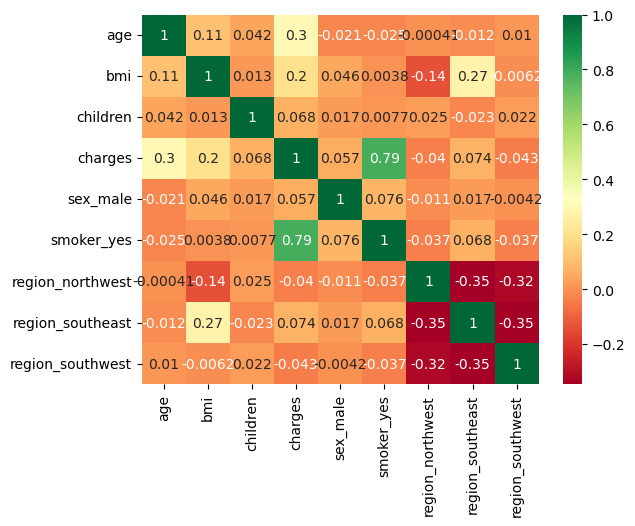

In [35]:
# Compute the correlation matrix
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')

Description of the dataset

In [36]:
# Assuming 'target' is your target variable
target = data_encoded[['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]

Determining Normality: Making our target variable normally distributed often will lead to better results If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values. How can we tell if our target is normally distributed?
Transformations techniques to get or approach normal distribution:
a.Square root
b.Log
c.Box cox

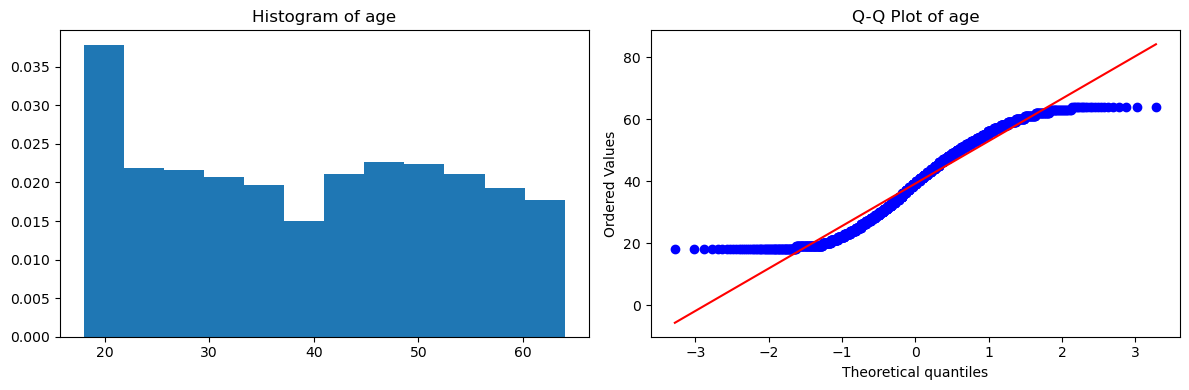

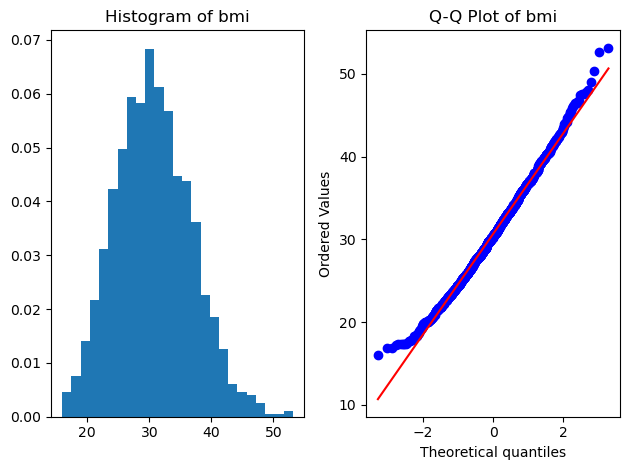

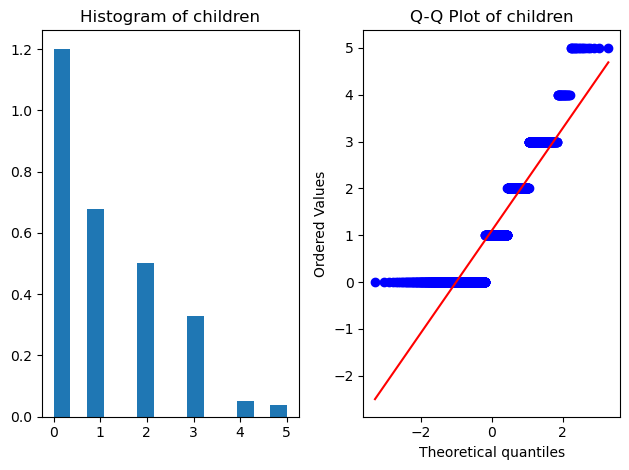

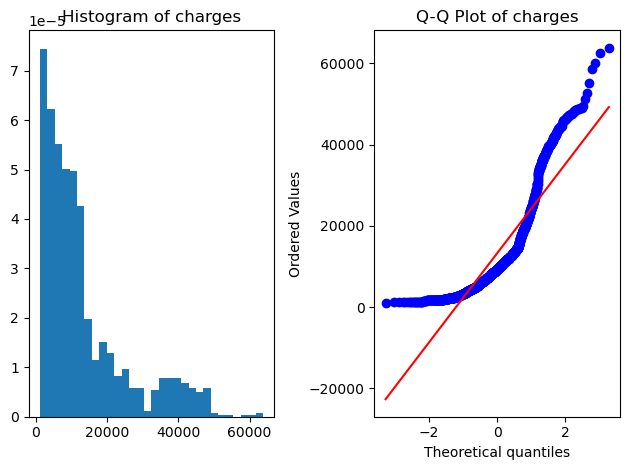

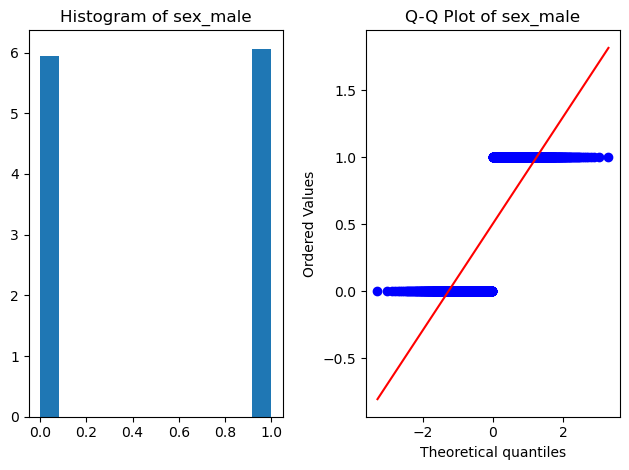

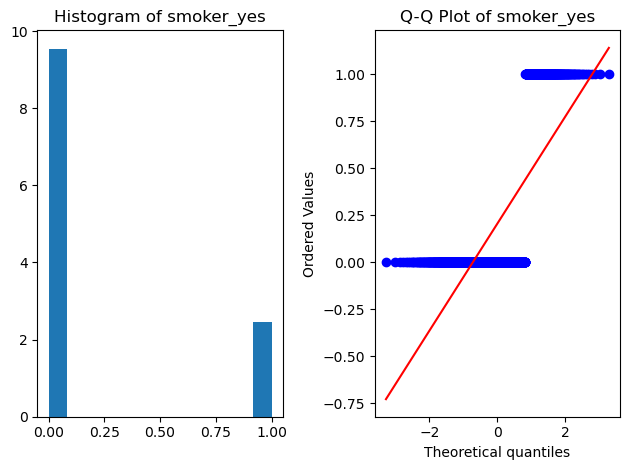

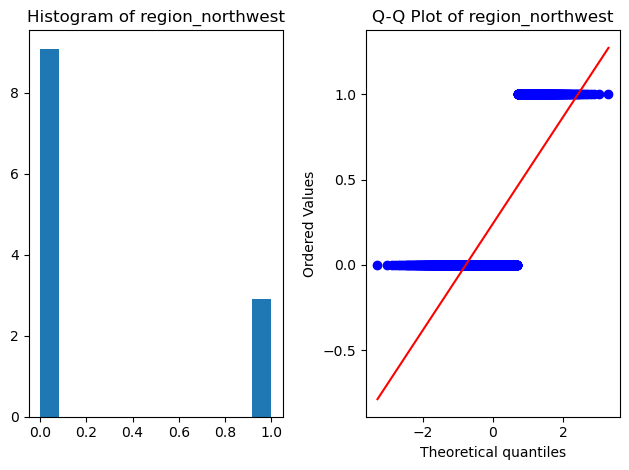

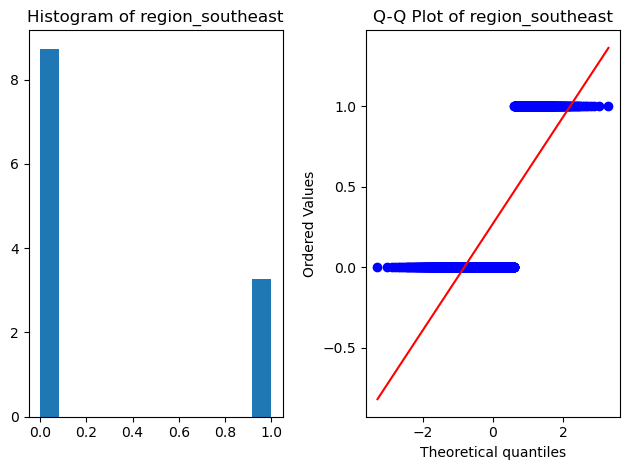

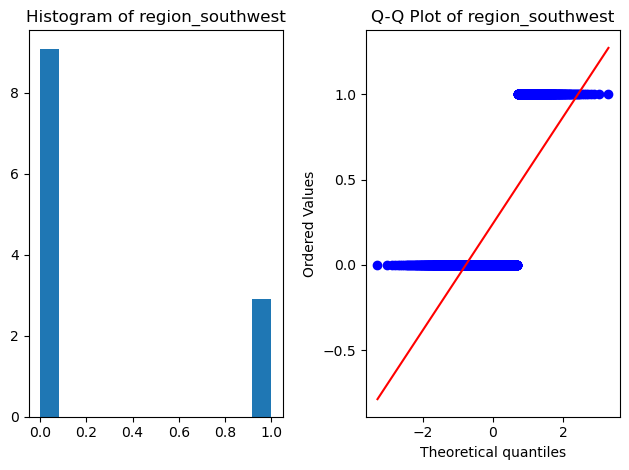

In [37]:
# Histogram and Density Plot
plt.figure(figsize=(12, 4))

# Iterate over the columns of the target DataFrame
for column in target.columns:
    plt.subplot(1, 2, 1)
    plt.hist(target[column], bins='auto', density=True)
    plt.title('Histogram of {}'.format(column))

    plt.subplot(1, 2, 2)
    stats.probplot(target[column], plot=plt)
    plt.title('Q-Q Plot of {}'.format(column))

    plt.tight_layout()
    plt.show()


In [38]:
# Shapiro-Wilk Test
for column in target.columns:
    _, p_value = stats.shapiro(target[column])
    print('Shapiro-Wilk Test for {} : p-value = {}'.format(column, p_value))

Shapiro-Wilk Test for age : p-value = 5.687060076887153e-22
Shapiro-Wilk Test for bmi : p-value = 2.6033414542325772e-05
Shapiro-Wilk Test for children : p-value = 5.06690727121734e-36
Shapiro-Wilk Test for charges : p-value = 1.1505194006561963e-36
Shapiro-Wilk Test for sex_male : p-value = 0.0
Shapiro-Wilk Test for smoker_yes : p-value = 0.0
Shapiro-Wilk Test for region_northwest : p-value = 0.0
Shapiro-Wilk Test for region_southeast : p-value = 0.0
Shapiro-Wilk Test for region_southwest : p-value = 0.0


In [39]:
# Select target columns
target_columns = ['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
# Apply transformations
transformed_sqrt = pd.DataFrame()
transformed_log = pd.DataFrame()
transformed_boxcox = pd.DataFrame()

for column in target_columns:
    # Square Root Transformation
    transformed_sqrt[column] = np.sqrt(data_encoded[column])

    # Log Transformation
    transformed_log[column] = np.log1p(data_encoded[column])

    # Box-Cox Transformation
    min_value = data_encoded[column].min()
    shifted_values = data_encoded[column] - min_value + 1  # Shift values to ensure they are positive
    transformed_boxcox[column], _ = stats.boxcox(shifted_values)

# Print the transformed data
print(transformed_sqrt)
print(transformed_log)
print(transformed_boxcox)

           age       bmi  children     charges  sex_male  smoker_yes  \
0     4.358899  5.282045  0.000000  129.942002       0.0         1.0   
1     4.242641  5.811196  1.000000   41.539768       1.0         0.0   
2     5.291503  5.744563  1.732051   66.704288       1.0         0.0   
3     5.744563  4.764976  0.000000  148.271611       1.0         0.0   
4     5.656854  5.374012  0.000000   62.184043       1.0         0.0   
...        ...       ...       ...         ...       ...         ...   
1333  7.071068  5.565070  1.732051  102.958964       1.0         0.0   
1334  4.242641  5.649779  0.000000   46.967870       0.0         0.0   
1335  4.242641  6.070420  0.000000   40.371196       0.0         0.0   
1336  4.582576  5.079370  0.000000   44.810099       0.0         0.0   
1337  7.810250  5.391660  0.000000  170.708407       0.0         1.0   

      region_northwest  region_southeast  region_southwest  
0                  0.0               0.0               1.0  
1            

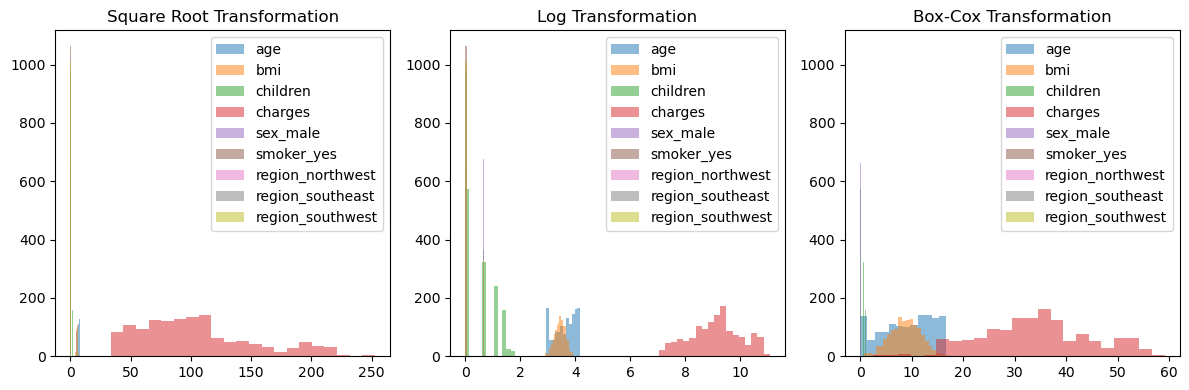

In [40]:
# Plot Transformed Distributions
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Square Root Transformation
for column in target_columns:
    axes[0].hist(transformed_sqrt[column], bins='auto', alpha=0.5, label=column)
axes[0].set_title('Square Root Transformation')
axes[0].legend()

# Log Transformation
for column in target_columns:
    axes[1].hist(transformed_log[column], bins='auto', alpha=0.5, label=column)
axes[1].set_title('Log Transformation')
axes[1].legend()

# Box-Cox Transformation
for column in target_columns:
    axes[2].hist(transformed_boxcox[column], bins='auto', alpha=0.5, label=column)
axes[2].set_title('Box-Cox Transformation')
axes[2].legend()

plt.tight_layout()
plt.show()


Choose "charges" as regression target:
make prediction on the test set with three basic methods:
-Linear Regression
-Random Forest Regression
-Gradient Boosting Regression



In [41]:

# Split the data into input features (X) and target variable (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_preds = linear_model.predict(X_test)
linear_rmse = mean_squared_error(y_test, linear_preds, squared=False)
linear_r2 = r2_score(y_test, linear_preds)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
rf_r2 = r2_score(y_test, rf_preds)

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
gb_rmse = mean_squared_error(y_test, gb_preds, squared=False)
gb_r2 = r2_score(y_test, gb_preds)

# Print evaluation metrics
print("Linear Regression - RMSE: {:.4f}, R^2: {:.4f}".format(linear_rmse, linear_r2))
print("Random Forest Regression - RMSE: {:.4f}, R^2: {:.4f}".format(rf_rmse, rf_r2))
print("Gradient Boosting Regression - RMSE: {:.4f}, R^2: {:.4f}".format(gb_rmse, gb_r2))


Linear Regression - RMSE: 5796.2847, R^2: 0.7836
Random Forest Regression - RMSE: 4576.2999, R^2: 0.8651
Gradient Boosting Regression - RMSE: 4329.5700, R^2: 0.8793


Applying various linear regression models with advanced techniques:
Through the following steps for Vanilla Linear Regression, Lasso Regression, Ridge Regression and ElasticNetCV:
-Chain multiple data processing steps together using Pipeline
-Use the KFolds object to split data into multiple folds.
-Perform cross validation using SciKit Learn with cross_val_predict and GridSearchCV

In [42]:

# Define the data processing steps
preprocessing_steps = [('scaler', StandardScaler())]

# Define the regression models
models = [
    ('Linear Regression', LinearRegression()),
    ('Lasso Regression', Lasso()),
    ('Ridge Regression', Ridge()),
    ('ElasticNetCV', ElasticNetCV())
]

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}
for name, model in models:
    pipeline = Pipeline(steps=[*preprocessing_steps, (name, model)])

    # Perform grid search for hyperparameter tuning
    param_grid = {}  # Add hyperparameters if needed
    grid_search = GridSearchCV(pipeline, param_grid, cv=kfold)
    grid_search.fit(X, y)

    # Perform cross-validation and obtain predictions
    predicted = cross_val_predict(grid_search.best_estimator_, X, y, cv=kfold)

    # Calculate RMSE and R-squared
    rmse = np.sqrt(mean_squared_error(y, predicted))
    r2 = r2_score(y, predicted)

    # Store results in dictionary
    results[name] = {'predicted': predicted, 'RMSE': rmse, 'R-squared': r2}

# Print RMSE and R-squared values for each model
for name, result in results.items():
    print(f"Model: {name}")
    print(f"RMSE: {result['RMSE']}")
    print(f"R-squared: {result['R-squared']}")
    print()


Model: Linear Regression
RMSE: 6082.254514130132
R-squared: 0.7475561512871729

Model: Lasso Regression
RMSE: 6082.233097079179
R-squared: 0.7475579291125629

Model: Ridge Regression
RMSE: 6082.234719428023
R-squared: 0.7475577944419082

Model: ElasticNetCV
RMSE: 11252.993295430302
R-squared: 0.13588462169113846



Models Flaws and Strength and further suggestions:

Linear Regression:
Flaws: Assumes a linear relationship between predictors and the target variable, which may not hold in all cases.
Strengths: Simple and interpretable, works well when the relationship is linear.


Lasso Regression:
Flaws: May result in a high number of zero coefficients, leading to a sparse model. Selecting the regularization parameter can be challenging.
Strengths: Performs automatic feature selection, can handle multicollinearity.


Ridge Regression:
Flaws: Requires tuning the regularization parameter, and the resulting model may still include all predictors.
Strengths: Reduces the impact of multicollinearity, provides more stable estimates.

ElasticNet Regression:
Flaws: Requires tuning two hyperparameters, making it more complex than Lasso or Ridge regression.
Strengths: Combines the advantages of Lasso and Ridge regression, handles both feature selection and multicollinearity.

Random Forest Regression:
Flaws: Can be prone to overfitting if not properly tuned, may not capture linear relationships as effectively as other models.
Strengths: Handles complex relationships, captures interactions between predictors, robust to outliers.

Gradient Boosting Regression:
Flaws: Requires careful tuning of hyperparameters, potentially sensitive to overfitting if not properly regularized.
Strengths: Captures complex relationships, handles both linear and nonlinear patterns, can achieve high predictive accuracy.

Further suggestions:
Consider performing feature selection or dimensionality reduction techniques before training the models to eliminate irrelevant or redundant predictors.
Evaluate model performance using cross-validation to get a more robust estimate of their generalization ability.
Tune the hyperparameters of the models using techniques like grid search or randomized search to optimize their performance.

Consider ensembling or stacking multiple models to combine their strengths and improve overall performance.
Explore other regression models such as Support Vector Regression, XGBoost, or Neural Networks to see if they can provide better results for your specific problem.

In [43]:
# Split the data into training and testing sets
X = data_encoded.drop('charges', axis=1)  # Predictor variables
y = transformed_boxcox['charges']  # Transformed target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()

# Cross-validation for model evaluation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Define the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Lasso Regression', Lasso()),
    ('Ridge Regression', Ridge()),
    ('ElasticNet Regression', ElasticNet()),
    ('Random Forest Regression', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting Regression', GradientBoostingRegressor(random_state=42)),
    ('Support Vector Regression', SVR()),
    ('XGBoost Regression', xgb.XGBRegressor(random_state=42)),
    ('Neural Network Regression', MLPRegressor(random_state=42, max_iter=5000)),
    ('SGD Regression', SGDRegressor(random_state=42))
]

# Evaluate models using cross-validation
for model_name, model in models:
    pipeline = Pipeline([('scaler', scaler), ('model', model)])

    scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
    rmse_scores = np.sqrt(-scores)
    r2_scores = cross_val_score(pipeline, X_train, y_train, scoring='r2', cv=cv)

    print(f'{model_name}:')
    print(f'RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std():.2f})')
    print(f'R^2: {r2_scores.mean():.2f} (+/- {r2_scores.std():.2f})')
    print()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0],
    'model__l1_ratio': [0.0001, 0.001, 0.01, 0.1, 0.5, 1]
}

elasticnet_pipeline = Pipeline([('scaler', scaler),
                                ('model', ElasticNet())])

grid_search = GridSearchCV(elasticnet_pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', cv=cv)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

# Calculate additional evaluation metrics for best model on training set
y_pred_train = best_model.predict(X_train)
best_mae_train = mean_absolute_error(y_train, y_pred_train)
best_medae_train = median_absolute_error(y_train, y_pred_train)
best_r2_train = r2_score(y_train, y_pred_train)

# Calculate additional evaluation metrics for best model on test set
y_pred_test = best_model.predict(X_test)
best_mae_test = mean_absolute_error(y_test, y_pred_test)
best_medae_test = median_absolute_error(y_test, y_pred_test)
best_r2_test = r2_score(y_test, y_pred_test)

print('Best Model:')
print(f'{best_model.named_steps["model"].__class__.__name__}')
print(f'Best Parameters: {best_params}')
print(f'Best RMSE: {best_rmse:.2f}')
print(f'Best MAE (Train): {best_mae_train:.2f}')
print(f'Best MedAE (Train): {best_medae_train:.2f}')
print(f'Best R^2 (Train): {best_r2_train:.2f}')
print(f'Best MAE (Test): {best_mae_test:.2f}')
print(f'Best MedAE (Test): {best_medae_test:.2f}')
print(f'Best R^2 (Test): {best_r2_test:.2f}')
print()

# Ensemble with Stacking
stacking_regressor = StackingRegressor(estimators=[('Random Forest', RandomForestRegressor(random_state=42)), ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),('SVR', SVR())], final_estimator=Lasso())

stacking_pipeline = Pipeline([('scaler', scaler), ('stacking_regressor', stacking_regressor)])

scores = cross_val_score(stacking_pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
rmse_scores = np.sqrt(-scores)
r2_scores = cross_val_score(stacking_pipeline, X_train, y_train, scoring='r2', cv=cv)

print('Stacking Regressor:')
print(f'RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std():.2f})')
print(f'R^2: {r2_scores.mean():.2f} (+/- {r2_scores.std():.2f})')
print()


Linear Regression:
RMSE: 5.22 (+/- 0.67)
R^2: 0.75 (+/- 0.06)

Lasso Regression:
RMSE: 5.60 (+/- 0.61)
R^2: 0.71 (+/- 0.05)

Ridge Regression:
RMSE: 5.22 (+/- 0.67)
R^2: 0.75 (+/- 0.06)

ElasticNet Regression:
RMSE: 6.40 (+/- 0.54)
R^2: 0.63 (+/- 0.05)

Random Forest Regression:
RMSE: 4.63 (+/- 0.50)
R^2: 0.80 (+/- 0.04)

Gradient Boosting Regression:
RMSE: 4.36 (+/- 0.68)
R^2: 0.82 (+/- 0.05)

Support Vector Regression:
RMSE: 4.85 (+/- 0.86)
R^2: 0.78 (+/- 0.07)

XGBoost Regression:
RMSE: 5.11 (+/- 0.55)
R^2: 0.76 (+/- 0.05)

Neural Network Regression:
RMSE: 4.49 (+/- 0.64)
R^2: 0.81 (+/- 0.05)

SGD Regression:
RMSE: 5.22 (+/- 0.68)
R^2: 0.75 (+/- 0.06)

Best Model:
ElasticNet
Best Parameters: {'model__alpha': 0.001, 'model__l1_ratio': 0.0001}
Best RMSE: 5.26
Best MAE (Train): 3.21
Best MedAE (Train): 1.46
Best R^2 (Train): 0.75
Best MAE (Test): 3.05
Best MedAE (Test): 1.48
Best R^2 (Test): 0.80

Stacking Regressor:
RMSE: 4.34 (+/- 0.66)
R^2: 0.82 (+/- 0.05)



END.